In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

from sklearn import model_selection
from sklearn import tree, linear_model, ensemble, neighbors, svm
from sklearn import metrics

from warnings import filterwarnings

%matplotlib inline
sns.set_context("notebook")
plt.style.use("fivethirtyeight")
filterwarnings("ignore")



We can check basic info about data, like features, NA entries, etc. using pandas library 
functions

In [77]:
df = pd.read_csv("winequality-white.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


After that, we check if there are any undefined entries. We cannot continue analysis until we replace them with some meaningful values (like mean or median of that column).

In [78]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Since there are no null values we can safely proceed. As the next step, we should check the ratios of the classes in the data

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


{3, 4, 5, 6, 7, 8, 9}

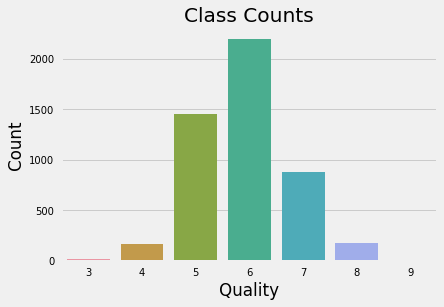

In [79]:
print(df['quality'].value_counts())
sns.countplot(df['quality'])
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Class Counts")
set(df['quality'])

We see that there are mainly average class wines in the datasets, and very few excellent or poor wines. We group them in three categories: poor if quality is less than five, excellent if quality is greater than 6, else average

In [54]:
poor = df['quality'] < 5
excellent = df['quality'] > 6
average = ~(poor | excellent)
df_orig = df.copy()

1    3655
2    1060
0     183
Name: quality, dtype: int64


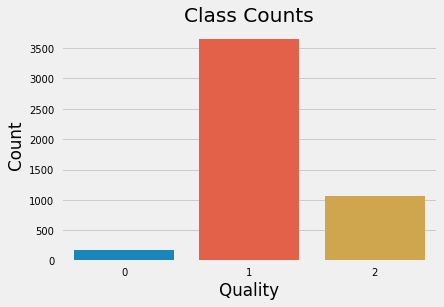

In [55]:
df = df_orig.copy()
df.loc[poor, 'quality'] = 0
df.loc[average, 'quality'] = 1
df.loc[excellent, 'quality'] = 2
sns.countplot(df['quality'])
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Class Counts")
set(df['quality'])
print(df['quality'].value_counts())

In [47]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [80]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    df.drop(["quality"], axis=1),
    df["quality"],
    train_size = 0.8,
    random_state = 42) # What is the meaning of life

In [81]:
# Fit a decision tree on all training data:
tree = tree.DecisionTreeRegressor()
tree = tree.fit(X_train, y_train)

In [82]:
print("sklearn decision tree, training error: %f" %
      metrics.mean_absolute_error(y_train, tree.predict(X_train)))
print("sklearn decision tree, testing error: %f" %
      metrics.mean_absolute_error(y_test, tree.predict(X_test)))


sklearn decision tree, training error: 0.000000
sklearn decision tree, testing error: 0.483673


In [83]:
# Fit linear regression on all training data:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

# Compute training error and testing error, this time on the linear
# regression model:
print("sklearn linear regression, training error: %f" %
      metrics.mean_absolute_error(y_train, lr.predict(X_train)))
print("sklearn linear regression, testing error: %f" %
      metrics.mean_absolute_error(y_test, lr.predict(X_test)))

sklearn linear regression, training error: 0.582647
sklearn linear regression, testing error: 0.586267


In [86]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)

# Compute training error and testing error, this time on the KNN
# classifier model:
print("sklearn linear regression, training error: %f" %
      metrics.mean_absolute_error(y_train, knn.predict(X_train)))
print("sklearn linear regression, testing error: %f" %
      metrics.mean_absolute_error(y_test, knn.predict(X_test)))

sklearn linear regression, training error: 0.448698
sklearn linear regression, testing error: 0.631633


In [ ]:
svc = svm.SVC(C=0.01, gamma=0.1, kernel="poly", degree=5, coef0=10, probability=True)
svc.fit(X_train, y_train)

# Compute training error and testing error, this time on the Support Vector Machine
# classifier model:
print("sklearn linear regression, training error: %f" %
      metrics.mean_absolute_error(y_train,svc.predict(X_train)))
print("sklearn linear regression, testing error: %f" %
      metrics.mean_absolute_error(y_test, svc.predict(X_test)))